# Mini Project 3

Welcome to your Third Mini Project! You will build a convolutional neural network to classify objects and tune hyperparameters to optimize your model. **Please complete your assignment in this Jupyter Notebook.**

---

**Requirements**: 
- Pytorch is allowed to implement your NNs.
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.
- Write your analysis and conclusion in a proper format. [Click here](https://www.markdownguide.org/basic-syntax/) to learn how to use Markdown.

## Problem Description
This dataset consists of four different classes: **Bicycle, Motorcycle, Car, Truck**. Bicycle, Motorcycle, and Car data are collected from the 2005 PASCAL dataset [VOC2005](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1). Moreover, the Truck data is collected from the Internet (see examples below).

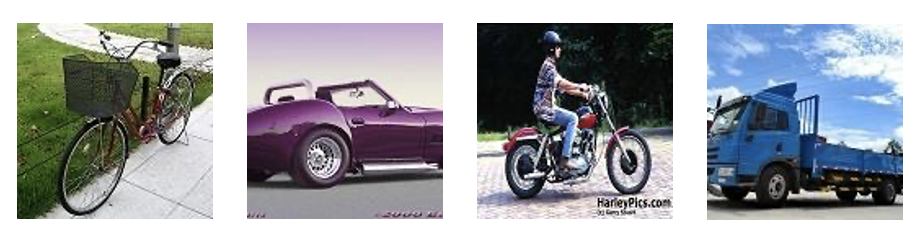



- The width and height of each **RGB** image are 120 pixels and 120 pixels respectively.
- The filename of an image represents its index.
- Labels are saved in `labels.csv` where the first column is the image index and the second column is the label.
- Labels and their corresponding classes are listed below.

|Label|0|1|2|3|
|-----|:-:|:-:|:-:|:-:|
|Class|Bicycle|Car|Motocycle|Truck|

### Tasks

1. Load and pre-process data
    - Define a function of `load_data()` to load imges and labels.
    - Implement a function of `preprocess()` to pre-process the loaded data.
        - Normalization
        - One-hot encoding
        - Splitting dataset into training set and test set
    - Plot some examples in your training set. **Note**: all four classes should be shown in your plot.
2. Build your CNN model
    - Build a CNN based on Pytorch.
    - Use the [PyTorchViz](https://github.com/szagoruyko/pytorchviz) or other tools to visualize your model.
3. Train your model
    - Initialize hyperparameters.
    - Train your model.
    - Evaluate the trained model on the test data in each training epoch.
    - Visualize the performance including training loss, training accuracy, test loss, and test accuracy.
    - Plot some examples of your prediction results.
4. Tune hyperparameters
    - Generate a set of models by tuning hyperparameters including:
        - kernel size
        - number of hidden layers
        - learning rate
        - epochs
        - activation function
    - Analyze the effects of each hyperparameter shown above.
5. Conclusion
    - Visualize the optimal model.
    - Describe its hyperparameters.
    - Plot the performance.
    - Plot some examples of prediction results.

## Task 1: Load and Pre-Process Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import glob
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Set import path to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
def load_data(folder):
    """
        Load the dataset, included images and labels from the given folder.
        
        Parameters
        ----------
        folder: string
            Path of the folder saved dataset.

        Return
        ----------
        images: ndarray
            Output of images.
        labels: ndarray
            Output of labels.
    """
    # TODO: write your code here
    labels = pd.read_csv(folder+"labels.csv", usecols=[1]) # Read dataset from CSV file present in `folder`
    images = [] # Empty list to store images
    
    for img in sorted(glob.glob(folder+"*.jpg")): # Iterate alphabetically over all images (files with JPG extension) in `folder`
        plt_img = plt.imread(img) # Read image using PLT library
        images.append(plt_img) # Append image to list
    images = np.asarray(images) # Convert list to ndarray
    labels = np.asarray(labels) # Convert list to ndarray
    return images, labels

In [4]:
def preprocess(X, y, train_size=0.8):
    """
        Normalize the features from the range [0, 255] to the range [0, 1].
        One-hot encode labels.
        Split the dataset into training set and test set. 
        
        Parameters
        ----------
        X: ndarray
            Input of images.
        y: ndarray
            Input of labels.
        train_size: float
            The proportion of the dataset to include in the train split.

        Return
        ----------
        X_train: ndarray
            Splitted features of the training data.
        y_train: ndarray
            Splitted labels of the traning data.
        X_test: ndarray
            Splitted features of the test data.
        y_test: ndarray
            Splitted labels of the test data.
    """
    # TODO: write your code here
    X_norm = np.divide(X, 255) # Normalize the images (features)
    #n_values = np.max(y) + 1 # Number of classes (used for OHE)
    #y_ohe = np.eye(n_values)[y] # One-hot encoding (set label index to 1, others to zero)
    ohe = OneHotEncoder(sparse_output=False)
    y_int = y.reshape(len(y), 1)
    y_ohe = ohe.fit_transform(y_int)
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y_ohe, test_size=1-train_size, random_state=1000) # Perform train-test split
    return X_train, X_test, y_train, y_test

In [5]:
# TODO: load dataset
data_dir = "gdrive/My Drive/AuE-8930 Deep Learning/Mini-Project 3/dataset/" # Set dataset directory
images, labels = load_data(data_dir) # Load data

# TODO: pre-process dataset
X_train, X_test, y_train, y_test = preprocess(images, labels, train_size=0.8) # Preprocess data

# TODO: print out shapes of X_train, y_train, X_test, and y_test
print("X_train:{}\ty_train: {}\tX_test: {}\ty_test: {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape)) # Sanity check

X_train:(759, 120, 120, 3)	y_train: (759, 4)	X_test: (190, 120, 120, 3)	y_test: (190, 4)


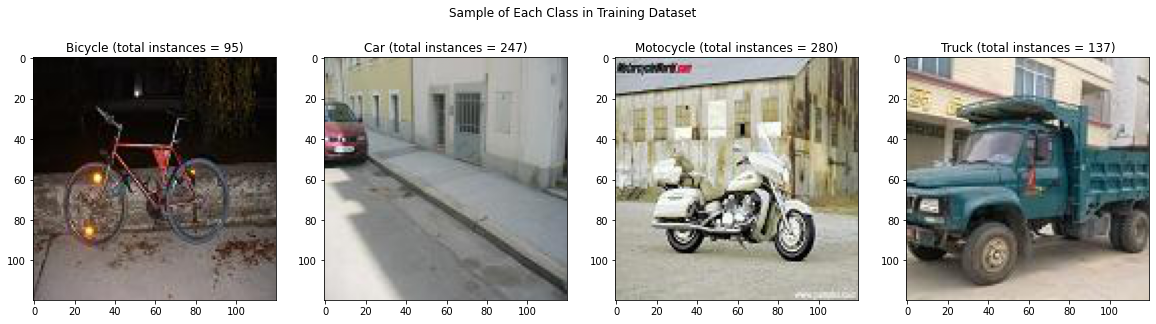

In [6]:
# TODO: get examples of each class from the training set
unique_val, unique_idx, unique_cnt = np.unique(y_train, return_index=True, return_counts=True, axis=0) # Get unique value, index (first occurance) and count for each class
unique_images = X_train[np.flip(unique_idx)] # Get images corresponding to unique_idx
unique_labels = y_train[np.flip(unique_idx)] # Get labels corresponding to unique_idx

# TODO: plot out selected examples in ONE figure
def switch_ohe(label_ohe):
    """
        Generate semantic class name (str) based on numerical class label (int). 
        
        Parameters
        ----------
        label: ndarray
            One-hot encoded label of the class.

        Return
        ----------
        semantic: str
            Semantic class name.
    """
    if np.array_equal(label_ohe, [1.,0.,0.,0.]):
        semantic = "Bicycle"
    elif np.array_equal(label_ohe, [0.,1.,0.,0.]):
        semantic = "Car"
    elif np.array_equal(label_ohe, [0.,0.,1.,0.]):
        semantic = "Motocycle"
    elif np.array_equal(label_ohe, [0.,0.,0.,1.]):
        semantic = "Truck"
    else:
        semantic = "Unknown"
    return semantic

figure, axes = plt.subplots(1, len(unique_labels), figsize = (5*len(unique_labels), 5)) # Set figure size based on number of classes
for i in range(len(unique_labels)): # Loop through all the classes
    image = unique_images[i] # Get the unique image from array
    axes[i].imshow(image) # Show (plot) the image
    axes[i].set_title("{} (total instances = {})".format(switch_ohe(unique_labels[i]), unique_cnt[i])) # Set axis title [Format: <class> (total instances = <number of instances>)]
figure.suptitle("Sample of Each Class in Training Dataset") # Set figure title
plt.show() # Show the figure

## Task 2: Build Convolutional Neural Network

In [7]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data
!pip install torchviz # Install torchviz
from torchviz import make_dot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Prepare data for PyTorch
X_train = X_train.reshape(X_train.shape[0], X_train.shape[3], X_train.shape[1], X_train.shape[2]) # Reshape array
X_test = X_test.reshape(X_test.shape[0], X_test.shape[3], X_test.shape[1], X_test.shape[2]) # Reshape array

X_train_pytorch = torch.from_numpy(X_train.astype(np.float32)) # Convert Numpy array to PyTorch tensor
y_train_pytorch = torch.from_numpy(y_train.astype(np.float32)) # Convert Numpy array to PyTorch tensor
y_train_pytorch = torch.argmax(y_train_pytorch, dim=1) # Convert one-hot encoded labels to class indices
X_test_pytorch = torch.from_numpy(X_test.astype(np.float32)) # Convert Numpy array to PyTorch tensor
y_test_pytorch = torch.from_numpy(y_test.astype(np.float32)) # Convert Numpy array to PyTorch tensor
y_test_pytorch = torch.argmax(y_test_pytorch, dim=1) # Convert one-hot encoded labels to class indices

In [9]:
# TODO: build a CNN model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) # CONV1 layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0) # CONV2 layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # POOL layer
        self.fc1 = nn.Linear(in_features=32*28*28, out_features=128) # FC1 layer
        self.fc2 = nn.Linear(in_features=128, out_features=64) # FC2 layer
        self.out = nn.Linear(in_features=64, out_features=4) # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # POOL1 after ReLU activation of CONV1 layer
        x = self.pool(F.relu(self.conv2(x))) # POOL2 after ReLU activation of CONV2 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.relu(self.fc1(x)) # ReLU activation of FC1 layer
        x = F.relu(self.fc2(x)) # ReLU activation of FC2 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x

model = ConvNet() # Compile model

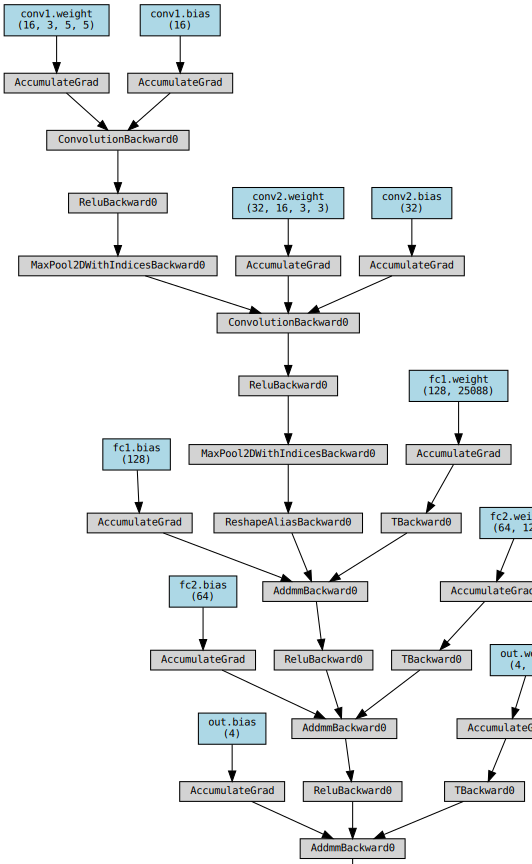

In [10]:
# TODO: visualize the model
x = X_train_pytorch # PyTorch compatible input features
y = model(x) # Run predictions on inputs
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]), show_attrs=False, show_saved=False) # Generate visualization of PyTorch execution graphs and traces

## Task 3: Train Model

In [11]:
# Import libraries
import copy
import tqdm
import torchvision

In [12]:
# TODO: initialize hyperparameters
n_epochs = 10 # Number of epochs
batch_size = 32 # Batch size
batches_per_epoch = len(X_train) // batch_size # Batches per epoch
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer

In [13]:
# TODO: train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist = [] # Empty list to store training loss history
train_acc_hist = [] # Empty list to store training accuracy history
test_loss_hist = [] # Empty list to store testing loss history
test_acc_hist = [] # Empty list to store testing accuracy history
 
for epoch in range(n_epochs):
    epoch_loss = [] # Empty list to store training loss for current epoch
    epoch_acc = [] # Empty list to store training accuracy for current epoch
    # Training
    model.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i in bar:
            # Sample a batch
            start = i * batch_size # Start index for each batch
            X_batch = X_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            y_batch = y_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            # Forward propagation
            y_pred = model(X_batch) # Get prediction
            loss = loss_fn(y_pred, y_batch) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == y_batch).float().mean() # Compute training accuracy
            epoch_loss.append(float(loss)) # Append current loss value
            epoch_acc.append(float(acc)) # Append current accuracy value
            bar.set_postfix(
                acc=round(float(acc),4), # Print current loss value after progress bar
                loss=round(float(loss),4) # Print current loss value after progress bar
            )
    # Validation
    model.eval() # Set model in evaluation mode
    y_pred = model(X_test_pytorch) # Get predictions on testing set
    loss = loss_fn(y_pred, y_test_pytorch) # Compute testing loss
    acc = (torch.argmax(y_pred, 1) == y_test_pytorch).float().mean() # Compute training accuracy
    loss = float(loss) # Convert to float
    acc = float(acc) # Convert to float
    train_loss_hist.append(np.mean(epoch_loss)) # Compute and append mean training loss value
    train_acc_hist.append(np.mean(epoch_acc)) # Compute and append mean training accuracy value
    test_loss_hist.append(loss) # Append testing loss value
    test_acc_hist.append(acc) # Append testing accuracy value
    if acc > best_acc: # Compare current accuracy with best so far
        best_acc = acc # Update best accuracy
        best_wts = copy.deepcopy(model.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1} Test: acc={round(acc,4)}, loss={round(loss,4)}") # Print testing accuracy and loss
    
model.load_state_dict(best_wts) # Load model that gave best accuracy

Epoch 1 Train: 100%|██████████| 23/23 [00:11<00:00,  2.01batch/s, acc=0.438, loss=1.16]


Epoch 1 Test: acc=0.4684, loss=1.1109


Epoch 2 Train: 100%|██████████| 23/23 [00:14<00:00,  1.63batch/s, acc=0.406, loss=1.29]


Epoch 2 Test: acc=0.5263, loss=1.1072


Epoch 3 Train: 100%|██████████| 23/23 [00:05<00:00,  4.14batch/s, acc=0.438, loss=1.07]


Epoch 3 Test: acc=0.5579, loss=1.0355


Epoch 4 Train: 100%|██████████| 23/23 [00:06<00:00,  3.47batch/s, acc=0.594, loss=0.946]


Epoch 4 Test: acc=0.5737, loss=1.0094


Epoch 5 Train: 100%|██████████| 23/23 [00:05<00:00,  4.25batch/s, acc=0.562, loss=0.94]


Epoch 5 Test: acc=0.5632, loss=0.996


Epoch 6 Train: 100%|██████████| 23/23 [00:06<00:00,  3.49batch/s, acc=0.688, loss=0.789]


Epoch 6 Test: acc=0.5474, loss=1.0178


Epoch 7 Train: 100%|██████████| 23/23 [00:06<00:00,  3.48batch/s, acc=0.656, loss=0.777]


Epoch 7 Test: acc=0.5526, loss=1.0847


Epoch 8 Train: 100%|██████████| 23/23 [00:06<00:00,  3.49batch/s, acc=0.75, loss=0.688]


Epoch 8 Test: acc=0.5, loss=1.2767


Epoch 9 Train: 100%|██████████| 23/23 [00:05<00:00,  4.20batch/s, acc=0.719, loss=0.758]


Epoch 9 Test: acc=0.5421, loss=1.1344


Epoch 10 Train: 100%|██████████| 23/23 [00:06<00:00,  3.54batch/s, acc=0.781, loss=0.557]


Epoch 10 Test: acc=0.4579, loss=1.2066


<All keys matched successfully>

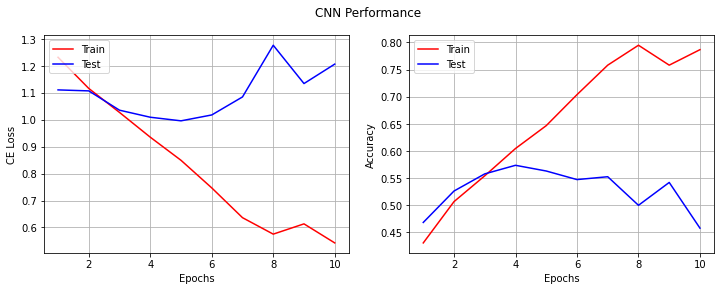

In [14]:
# TODO: visualize the training history including accuracy curves and loss curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create side-by-side subplots
fig.suptitle('CNN Performance') # Common plot title
# Plot loss curves
ax1.plot(np.linspace(1, n_epochs, n_epochs), train_loss_hist, label='Train', color='red') # Plot train loss
ax1.plot(np.linspace(1, n_epochs, n_epochs), test_loss_hist, label='Test', color='blue') # Plot test loss
ax1.legend(loc='upper left') # Show legend
ax1.set_xlabel('Epochs') # Show label for X-axis
ax1.set_ylabel('CE Loss') # Show label for Y-axis
ax1.grid(True) # Show grid
# Plot accuracy curves
ax2.plot(np.linspace(1, n_epochs, n_epochs), train_acc_hist, label='Train', color='red') # Plot train accuracy
ax2.plot(np.linspace(1, n_epochs, n_epochs), test_acc_hist, label='Test', color='blue') # Plot test accuracy
ax2.legend(loc='upper left') # Show legend
ax2.set_xlabel('Epochs') # Show label for X-axis
ax2.set_ylabel('Accuracy') # Show label for Y-axis
ax2.grid(True) # Show grid

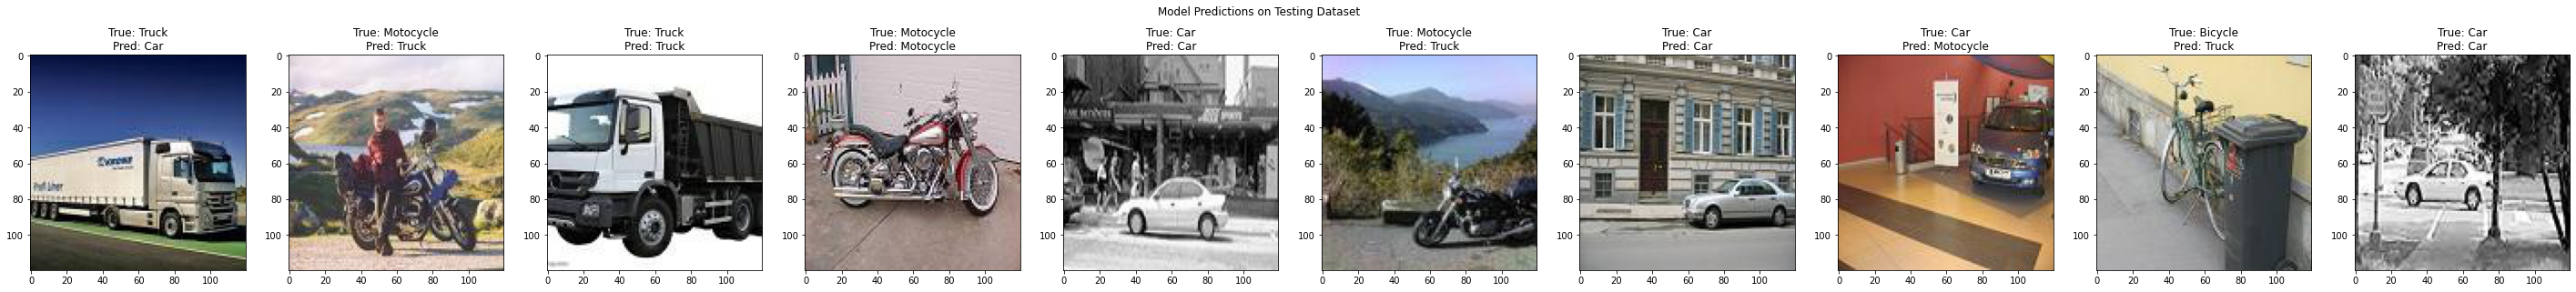

In [15]:
# TODO: visualize a couple of examples with predicted labels
rnd_idx = np.random.randint(low=0, high=len(X_test_pytorch)-1, size=10, dtype=int) # Random sampling indices
X_samples = X_test_pytorch[rnd_idx] # Perform random sampling on testing dataset (features)
y_samples = y_test_pytorch[rnd_idx] # Perform random sampling on testing dataset (labels)

def switch_int(label_int):
    """
        Generate semantic class name (str) based on numerical class label (int). 
        
        Parameters
        ----------
        label: int
            Numerical label of the class.

        Return
        ----------
        semantic: str
            Semantic class name.
    """
    if label_int == 0:
        semantic = "Bicycle"
    elif label_int == 1:
        semantic = "Car"
    elif label_int == 2:
        semantic = "Motocycle"
    elif label_int == 3:
        semantic = "Truck"
    else:
        semantic = "Unknown"
    return semantic

figure, axes = plt.subplots(1, len(y_samples), figsize = (5*len(y_samples), 5)) # Set figure size based on number of samples
for i in range(len(y_samples)): # Loop through all the samples
    image = torchvision.utils.make_grid(X_test_pytorch[i].resize_(X_test_pytorch[i].shape[1], X_test_pytorch[i].shape[2], X_test_pytorch[i].shape[0])) # Get the image from tensor
    axes[i].imshow(image) # Show (plot) the image
    model.eval() # Set model in evaluation mode
    y_pred = model(X_test_pytorch) # Get model prediction (logits)
    y_pred = torch.argmax(y_pred, 1) # Get crisp classification
    axes[i].set_title("True: {}\nPred: {}".format(switch_int(y_test_pytorch[i].item()), switch_int(y_pred[i].item()))) # Set axis title [Format: True: <true_label> \nPred: <pred_label>)]
figure.suptitle("Model Predictions on Testing Dataset") # Set figure title
plt.show() # Show the figure

## Task 4: Tune Hyperparameters

In [16]:
# Import libraries
from scipy.stats import qmc

In [17]:
# TODO: write your code here
# Sampling space for different hyperparameters
kernel_sizes = [3, 5, 7, 9, 11] # Sampling space for kernel sizes
hidden_layers = [1, 2, 3, 4, 5] # Sampling space for hidden layers
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1, 1] # Sampling space for learning rates
n_epochs = [5, 10, 15, 20, 25] # Sampling space for epochs
activation_fns = ["Tanh", "ELU", "ReLU", "LeakyReLU", "SiLU"] # Sampling space for activation functions
# Sampling technique
sampler = qmc.LatinHypercube(d=5, seed=1234) # 5-dimensional Latin hypercube sampling space
samples = sampler.integers(l_bounds=0, u_bounds=5, n=5) # Sample 5 random combinations of hyperparameters in range of int([0, 4)), i.e. {0, 1, 2, 3}
# Sampled hyperparameter sets
h_params_1 = [kernel_sizes[samples[0][0]], hidden_layers[samples[0][1]], learning_rates[samples[0][2]], n_epochs[samples[0][3]], activation_fns[samples[0][4]]] # Hyperparameter set 1
h_params_2 = [kernel_sizes[samples[1][0]], hidden_layers[samples[1][1]], learning_rates[samples[1][2]], n_epochs[samples[1][3]], activation_fns[samples[1][4]]] # Hyperparameter set 2
h_params_3 = [kernel_sizes[samples[2][0]], hidden_layers[samples[2][1]], learning_rates[samples[2][2]], n_epochs[samples[2][3]], activation_fns[samples[2][4]]] # Hyperparameter set 3
h_params_4 = [kernel_sizes[samples[3][0]], hidden_layers[samples[3][1]], learning_rates[samples[3][2]], n_epochs[samples[3][3]], activation_fns[samples[3][4]]] # Hyperparameter set 4
h_params_5 = [kernel_sizes[samples[4][0]], hidden_layers[samples[4][1]], learning_rates[samples[4][2]], n_epochs[samples[4][3]], activation_fns[samples[4][4]]] # Hyperparameter set 5
# Print sampled hyperparameter sets
print("LHS Sampled Hyperparameter Sets:")
print(h_params_1)
print(h_params_2)
print(h_params_3)
print(h_params_4)
print(h_params_5)

LHS Sampled Hyperparameter Sets:
[11, 3, 0.01, 5, 'ReLU']
[7, 2, 0.001, 20, 'ELU']
[9, 4, 0.0001, 15, 'SiLU']
[3, 5, 1, 25, 'Tanh']
[5, 1, 0.1, 10, 'LeakyReLU']


###Hyperparameter Set 1

- kernel_size = 11
- hidden_layers = 3
- learning_rate = 0.01
- n_epoch = 5
- activation_fn = ReLU

In [18]:
# Build a CNN model
class ConvNet1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=11, stride=1, padding=0) # CONV1 layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7, stride=1, padding=0) # CONV2 layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0) # CONV3 layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # POOL layer
        self.fc1 = nn.Linear(in_features=64*10*10, out_features=128) # FC1 layer
        self.fc2 = nn.Linear(in_features=128, out_features=96) # FC2 layer
        self.fc3 = nn.Linear(in_features=96, out_features=64) # FC3 layer
        self.out = nn.Linear(in_features=64, out_features=4) # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # POOL1 after ReLU activation of CONV1 layer
        x = self.pool(F.relu(self.conv2(x))) # POOL2 after ReLU activation of CONV2 layer
        x = self.pool(F.relu(self.conv3(x))) # POOL3 after ReLU activation of CONV3 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.relu(self.fc1(x)) # ReLU activation of FC1 layer
        x = F.relu(self.fc2(x)) # ReLU activation of FC2 layer
        x = F.relu(self.fc3(x)) # ReLU activation of FC3 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x

model1 = ConvNet1() # Compile model

In [19]:
# Initialize hyperparameters
n_epochs1 = 5 # Number of epochs
batch_size = 32 # Batch size
batches_per_epoch = len(X_train) // batch_size # Batches per epoch
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model1.parameters(), lr=0.01) # Optimizer

In [20]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist1 = [] # Empty list to store training loss history
train_acc_hist1 = [] # Empty list to store training accuracy history
test_loss_hist1 = [] # Empty list to store testing loss history
test_acc_hist1 = [] # Empty list to store testing accuracy history

for epoch in range(n_epochs1):
    epoch_loss = [] # Empty list to store training loss for current epoch
    epoch_acc = [] # Empty list to store training accuracy for current epoch
    # Training
    model1.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i in bar:
            # Sample a batch
            start = i * batch_size # Start index for each batch
            X_batch = X_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            y_batch = y_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            # Forward propagation
            y_pred = model1(X_batch) # Get prediction
            loss = loss_fn(y_pred, y_batch) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == y_batch).float().mean() # Compute training accuracy
            epoch_loss.append(float(loss)) # Append current loss value
            epoch_acc.append(float(acc)) # Append current accuracy value
            bar.set_postfix(
                acc=round(float(acc),4), # Print current loss value after progress bar
                loss=round(float(loss),4) # Print current loss value after progress bar
            )
    # Validation
    model1.eval() # Set model in evaluation mode
    y_pred = model1(X_test_pytorch) # Get predictions on testing set
    loss = loss_fn(y_pred, y_test_pytorch) # Compute testing loss
    acc = (torch.argmax(y_pred, 1) == y_test_pytorch).float().mean() # Compute training accuracy
    loss = float(loss) # Convert to float
    acc = float(acc) # Convert to float
    train_loss_hist1.append(np.mean(epoch_loss)) # Compute and append mean training loss value
    train_acc_hist1.append(np.mean(epoch_acc)) # Compute and append mean training accuracy value
    test_loss_hist1.append(loss) # Append testing loss value
    test_acc_hist1.append(acc) # Append testing accuracy value
    if acc > best_acc: # Compare current accuracy with best so far
        best_acc = acc # Update best accuracy
        best_wts = copy.deepcopy(model1.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1} Test: acc={round(acc,4)}, loss={round(loss,4)}") # Print testing accuracy and loss
    
model1.load_state_dict(best_wts) # Load model that gave best accuracy

Epoch 1 Train: 100%|██████████| 23/23 [00:14<00:00,  1.56batch/s, acc=0.469, loss=1.34]


Epoch 1 Test: acc=0.4211, loss=1.3157


Epoch 2 Train: 100%|██████████| 23/23 [00:13<00:00,  1.73batch/s, acc=0.469, loss=1.31]


Epoch 2 Test: acc=0.4211, loss=1.293


Epoch 3 Train: 100%|██████████| 23/23 [00:12<00:00,  1.80batch/s, acc=0.469, loss=1.32]


Epoch 3 Test: acc=0.4211, loss=1.296


Epoch 4 Train: 100%|██████████| 23/23 [00:14<00:00,  1.59batch/s, acc=0.469, loss=1.32]


Epoch 4 Test: acc=0.4211, loss=1.2935


Epoch 5 Train: 100%|██████████| 23/23 [00:12<00:00,  1.80batch/s, acc=0.469, loss=1.32]


Epoch 5 Test: acc=0.4211, loss=1.292


<All keys matched successfully>

###Hyperparameter Set 2

- kernel_size = 7
- hidden_layers = 2
- learning_rate = 0.001
- n_epoch = 20
- activation_fn = ELU

In [21]:
# Build a CNN model
class ConvNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, stride=1, padding=0) # CONV1 layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) # CONV2 layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # POOL layer
        self.fc1 = nn.Linear(in_features=32*26*26, out_features=128) # FC1 layer
        self.fc2 = nn.Linear(in_features=128, out_features=64) # FC2 layer
        self.out = nn.Linear(in_features=64, out_features=4) # Output layer
    def forward(self, x):
        x = self.pool(F.elu(self.conv1(x))) # POOL1 after ELU activation of CONV1 layer
        x = self.pool(F.elu(self.conv2(x))) # POOL2 after ELU activation of CONV2 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.elu(self.fc1(x)) # ELU activation of FC1 layer
        x = F.elu(self.fc2(x)) # ELU activation of FC2 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x

model2 = ConvNet2() # Compile model

In [22]:
# Initialize hyperparameters
n_epochs2 = 20 # Number of epochs
batch_size = 32 # Batch size
batches_per_epoch = len(X_train) // batch_size # Batches per epoch
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model2.parameters(), lr=0.001) # Optimizer

In [23]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist2 = [] # Empty list to store training loss history
train_acc_hist2 = [] # Empty list to store training accuracy history
test_loss_hist2 = [] # Empty list to store testing loss history
test_acc_hist2 = [] # Empty list to store testing accuracy history

for epoch in range(n_epochs2):
    epoch_loss = [] # Empty list to store training loss for current epoch
    epoch_acc = [] # Empty list to store training accuracy for current epoch
    # Training
    model2.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i in bar:
            # Sample a batch
            start = i * batch_size # Start index for each batch
            X_batch = X_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            y_batch = y_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            # Forward propagation
            y_pred = model2(X_batch) # Get prediction
            loss = loss_fn(y_pred, y_batch) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == y_batch).float().mean() # Compute training accuracy
            epoch_loss.append(float(loss)) # Append current loss value
            epoch_acc.append(float(acc)) # Append current accuracy value
            bar.set_postfix(
                acc=round(float(acc),4), # Print current loss value after progress bar
                loss=round(float(loss),4) # Print current loss value after progress bar
            )
    # Validation
    model2.eval() # Set model in evaluation mode
    y_pred = model2(X_test_pytorch) # Get predictions on testing set
    loss = loss_fn(y_pred, y_test_pytorch) # Compute testing loss
    acc = (torch.argmax(y_pred, 1) == y_test_pytorch).float().mean() # Compute training accuracy
    loss = float(loss) # Convert to float
    acc = float(acc) # Convert to float
    train_loss_hist2.append(np.mean(epoch_loss)) # Compute and append mean training loss value
    train_acc_hist2.append(np.mean(epoch_acc)) # Compute and append mean training accuracy value
    test_loss_hist2.append(loss) # Append testing loss value
    test_acc_hist2.append(acc) # Append testing accuracy value
    if acc > best_acc: # Compare current accuracy with best so far
        best_acc = acc # Update best accuracy
        best_wts = copy.deepcopy(model2.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1} Test: acc={round(acc,4)}, loss={round(loss,4)}") # Print testing accuracy and loss
    
model2.load_state_dict(best_wts) # Load model that gave best accuracy

Epoch 1 Train: 100%|██████████| 23/23 [00:08<00:00,  2.66batch/s, acc=0.5, loss=1.07]


Epoch 1 Test: acc=0.5105, loss=1.1277


Epoch 2 Train: 100%|██████████| 23/23 [00:08<00:00,  2.61batch/s, acc=0.438, loss=1.06]


Epoch 2 Test: acc=0.5053, loss=1.1025


Epoch 3 Train: 100%|██████████| 23/23 [00:10<00:00,  2.12batch/s, acc=0.594, loss=0.874]


Epoch 3 Test: acc=0.5789, loss=1.0457


Epoch 4 Train: 100%|██████████| 23/23 [00:10<00:00,  2.30batch/s, acc=0.656, loss=0.734]


Epoch 4 Test: acc=0.5789, loss=1.0191


Epoch 5 Train: 100%|██████████| 23/23 [00:08<00:00,  2.72batch/s, acc=0.688, loss=0.767]


Epoch 5 Test: acc=0.6105, loss=1.0484


Epoch 6 Train: 100%|██████████| 23/23 [00:10<00:00,  2.25batch/s, acc=0.875, loss=0.477]


Epoch 6 Test: acc=0.5842, loss=1.3126


Epoch 7 Train: 100%|██████████| 23/23 [00:07<00:00,  3.28batch/s, acc=0.875, loss=0.356]


Epoch 7 Test: acc=0.5684, loss=1.3744


Epoch 8 Train: 100%|██████████| 23/23 [00:08<00:00,  2.83batch/s, acc=0.906, loss=0.257]


Epoch 8 Test: acc=0.5895, loss=1.4949


Epoch 9 Train: 100%|██████████| 23/23 [00:08<00:00,  2.72batch/s, acc=0.969, loss=0.13]


Epoch 9 Test: acc=0.5579, loss=1.4421


Epoch 10 Train: 100%|██████████| 23/23 [00:09<00:00,  2.33batch/s, acc=1, loss=0.0908]


Epoch 10 Test: acc=0.5947, loss=1.6118


Epoch 11 Train: 100%|██████████| 23/23 [00:07<00:00,  2.98batch/s, acc=1, loss=0.0515]


Epoch 11 Test: acc=0.6105, loss=1.5841


Epoch 12 Train: 100%|██████████| 23/23 [00:08<00:00,  2.75batch/s, acc=0.906, loss=0.291]


Epoch 12 Test: acc=0.6105, loss=1.7465


Epoch 13 Train: 100%|██████████| 23/23 [00:07<00:00,  3.20batch/s, acc=0.938, loss=0.163]


Epoch 13 Test: acc=0.5211, loss=2.2599


Epoch 14 Train: 100%|██████████| 23/23 [00:09<00:00,  2.54batch/s, acc=1, loss=0.0291]


Epoch 14 Test: acc=0.5526, loss=2.184


Epoch 15 Train: 100%|██████████| 23/23 [00:08<00:00,  2.72batch/s, acc=0.938, loss=0.159]


Epoch 15 Test: acc=0.5, loss=1.7988


Epoch 16 Train: 100%|██████████| 23/23 [00:07<00:00,  3.11batch/s, acc=1, loss=0.0194]


Epoch 16 Test: acc=0.5895, loss=2.3166


Epoch 17 Train: 100%|██████████| 23/23 [00:07<00:00,  2.95batch/s, acc=1, loss=0.0085]


Epoch 17 Test: acc=0.5526, loss=2.108


Epoch 18 Train: 100%|██████████| 23/23 [00:08<00:00,  2.72batch/s, acc=1, loss=0.0086]


Epoch 18 Test: acc=0.6105, loss=2.275


Epoch 19 Train: 100%|██████████| 23/23 [00:09<00:00,  2.55batch/s, acc=1, loss=0.0046]


Epoch 19 Test: acc=0.5842, loss=2.2852


Epoch 20 Train: 100%|██████████| 23/23 [00:07<00:00,  3.25batch/s, acc=1, loss=0.0007]


Epoch 20 Test: acc=0.6105, loss=2.2253


<All keys matched successfully>

###Hyperparameter Set 3

- kernel_size = 9
- hidden_layers = 4
- learning_rate = 0.0001
- n_epoch = 15
- activation_fn = SiLU

In [24]:
# Build a CNN model
class ConvNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=9, stride=1, padding=0) # CONV1 layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=7, stride=1, padding=0) # CONV2 layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0) # CONV3 layer
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0) # CONV4 layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # POOL layer
        self.fc1 = nn.Linear(in_features=128*4*4, out_features=128) # FC1 layer
        self.fc2 = nn.Linear(in_features=128, out_features=96) # FC2 layer
        self.fc3 = nn.Linear(in_features=96, out_features=64) # FC3 layer
        self.fc4 = nn.Linear(in_features=64, out_features=32) # FC4 layer
        self.out = nn.Linear(in_features=32, out_features=4) # Output layer

    def forward(self, x):
        x = self.pool(F.silu(self.conv1(x))) # POOL1 after SiLU activation of CONV1 layer
        x = self.pool(F.silu(self.conv2(x))) # POOL2 after SiLU activation of CONV2 layer
        x = self.pool(F.silu(self.conv3(x))) # POOL3 after SiLU activation of CONV3 layer
        x = self.pool(F.silu(self.conv4(x))) # POOL4 after SiLU activation of CONV4 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.silu(self.fc1(x)) # SiLU activation of FC1 layer
        x = F.silu(self.fc2(x)) # SiLU activation of FC2 layer
        x = F.silu(self.fc3(x)) # SiLU activation of FC3 layer
        x = F.silu(self.fc4(x)) # SiLU activation of FC4 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x

model3 = ConvNet3() # Compile model

In [25]:
# Initialize hyperparameters
n_epochs3 = 15 # Number of epochs
batch_size = 32 # Batch size
batches_per_epoch = len(X_train) // batch_size # Batches per epoch
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model3.parameters(), lr=0.0001) # Optimizer

In [26]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist3 = [] # Empty list to store training loss history
train_acc_hist3 = [] # Empty list to store training accuracy history
test_loss_hist3 = [] # Empty list to store testing loss history
test_acc_hist3 = [] # Empty list to store testing accuracy history

for epoch in range(n_epochs3):
    epoch_loss = [] # Empty list to store training loss for current epoch
    epoch_acc = [] # Empty list to store training accuracy for current epoch
    # Training
    model3.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i in bar:
            # Sample a batch
            start = i * batch_size # Start index for each batch
            X_batch = X_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            y_batch = y_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            # Forward propagation
            y_pred = model3(X_batch) # Get prediction
            loss = loss_fn(y_pred, y_batch) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == y_batch).float().mean() # Compute training accuracy
            epoch_loss.append(float(loss)) # Append current loss value
            epoch_acc.append(float(acc)) # Append current accuracy value
            bar.set_postfix(
                acc=round(float(acc),4), # Print current loss value after progress bar
                loss=round(float(loss),4) # Print current loss value after progress bar
            )
    # Validation
    model3.eval() # Set model in evaluation mode
    y_pred = model3(X_test_pytorch) # Get predictions on testing set
    loss = loss_fn(y_pred, y_test_pytorch) # Compute testing loss
    acc = (torch.argmax(y_pred, 1) == y_test_pytorch).float().mean() # Compute training accuracy
    loss = float(loss) # Convert to float
    acc = float(acc) # Convert to float
    train_loss_hist3.append(np.mean(epoch_loss)) # Compute and append mean training loss value
    train_acc_hist3.append(np.mean(epoch_acc)) # Compute and append mean training accuracy value
    test_loss_hist3.append(loss) # Append testing loss value
    test_acc_hist3.append(acc) # Append testing accuracy value
    if acc > best_acc: # Compare current accuracy with best so far
        best_acc = acc # Update best accuracy
        best_wts = copy.deepcopy(model3.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1} Test: acc={round(acc,4)}, loss={round(loss,4)}") # Print testing accuracy and loss
    
model3.load_state_dict(best_wts) # Load model that gave best accuracy

Epoch 1 Train: 100%|██████████| 23/23 [00:12<00:00,  1.79batch/s, acc=0.219, loss=1.4]


Epoch 1 Test: acc=0.3, loss=1.3785


Epoch 2 Train: 100%|██████████| 23/23 [00:14<00:00,  1.59batch/s, acc=0.406, loss=1.32]


Epoch 2 Test: acc=0.4316, loss=1.2817


Epoch 3 Train: 100%|██████████| 23/23 [00:12<00:00,  1.86batch/s, acc=0.375, loss=1.33]


Epoch 3 Test: acc=0.4579, loss=1.2898


Epoch 4 Train: 100%|██████████| 23/23 [00:15<00:00,  1.50batch/s, acc=0.406, loss=1.31]


Epoch 4 Test: acc=0.4368, loss=1.2733


Epoch 5 Train: 100%|██████████| 23/23 [00:14<00:00,  1.57batch/s, acc=0.375, loss=1.32]


Epoch 5 Test: acc=0.4263, loss=1.2749


Epoch 6 Train: 100%|██████████| 23/23 [00:12<00:00,  1.78batch/s, acc=0.438, loss=1.32]


Epoch 6 Test: acc=0.4526, loss=1.2766


Epoch 7 Train: 100%|██████████| 23/23 [00:14<00:00,  1.62batch/s, acc=0.406, loss=1.32]


Epoch 7 Test: acc=0.4474, loss=1.2759


Epoch 8 Train: 100%|██████████| 23/23 [00:13<00:00,  1.76batch/s, acc=0.375, loss=1.32]


Epoch 8 Test: acc=0.4368, loss=1.2726


Epoch 9 Train: 100%|██████████| 23/23 [00:12<00:00,  1.78batch/s, acc=0.375, loss=1.31]


Epoch 9 Test: acc=0.4368, loss=1.2659


Epoch 10 Train: 100%|██████████| 23/23 [00:14<00:00,  1.58batch/s, acc=0.344, loss=1.3]


Epoch 10 Test: acc=0.4421, loss=1.2536


Epoch 11 Train: 100%|██████████| 23/23 [00:12<00:00,  1.80batch/s, acc=0.375, loss=1.28]


Epoch 11 Test: acc=0.4526, loss=1.2347


Epoch 12 Train: 100%|██████████| 23/23 [00:12<00:00,  1.78batch/s, acc=0.375, loss=1.24]


Epoch 12 Test: acc=0.4474, loss=1.2129


Epoch 13 Train: 100%|██████████| 23/23 [00:14<00:00,  1.58batch/s, acc=0.469, loss=1.18]


Epoch 13 Test: acc=0.4474, loss=1.1969


Epoch 14 Train: 100%|██████████| 23/23 [00:12<00:00,  1.80batch/s, acc=0.562, loss=1.13]


Epoch 14 Test: acc=0.4526, loss=1.1833


Epoch 15 Train: 100%|██████████| 23/23 [00:12<00:00,  1.80batch/s, acc=0.531, loss=1.1]


Epoch 15 Test: acc=0.4737, loss=1.1775


<All keys matched successfully>

###Hyperparameter Set 4

- kernel_size = 3
- hidden_layers = 5
- learning_rate = 1
- n_epoch = 25
- activation_fn = Tanh

In [27]:
# Build a CNN model
class ConvNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) # CONV1 layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0) # CONV2 layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0) # CONV3 layer
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=72, kernel_size=3, stride=1, padding=0) # CONV4 layer
        self.conv5 = nn.Conv2d(in_channels=72, out_channels=96, kernel_size=3, stride=1, padding=0) # CONV5 layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # POOL layer
        self.fc1 = nn.Linear(in_features=96*1*1, out_features=128) # FC1 layer
        self.fc2 = nn.Linear(in_features=128, out_features=96) # FC2 layer
        self.fc3 = nn.Linear(in_features=96, out_features=64) # FC3 layer
        self.fc4 = nn.Linear(in_features=64, out_features=32) # FC4 layer
        self.fc5 = nn.Linear(in_features=32, out_features=16) # FC5 layer
        self.out = nn.Linear(in_features=16, out_features=4) # Output layer

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x))) # POOL1 after Tanh activation of CONV1 layer
        x = self.pool(F.tanh(self.conv2(x))) # POOL2 after Tanh activation of CONV2 layer
        x = self.pool(F.tanh(self.conv3(x))) # POOL3 after Tanh activation of CONV3 layer
        x = self.pool(F.tanh(self.conv4(x))) # POOL4 after Tanh activation of CONV4 layer
        x = self.pool(F.tanh(self.conv5(x))) # POOL5 after Tanh activation of CONV5 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.tanh(self.fc1(x)) # Tanh activation of FC1 layer
        x = F.tanh(self.fc2(x)) # Tanh activation of FC2 layer
        x = F.tanh(self.fc3(x)) # Tanh activation of FC3 layer
        x = F.tanh(self.fc4(x)) # Tanh activation of FC4 layer
        x = F.tanh(self.fc5(x)) # Tanh activation of FC5 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x

model4 = ConvNet4() # Compile model

In [28]:
# Initialize hyperparameters
n_epochs4 = 25 # Number of epochs
batch_size = 32 # Batch size
batches_per_epoch = len(X_train) // batch_size # Batches per epoch
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model4.parameters(), lr=1) # Optimizer

In [29]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist4 = [] # Empty list to store training loss history
train_acc_hist4 = [] # Empty list to store training accuracy history
test_loss_hist4 = [] # Empty list to store testing loss history
test_acc_hist4 = [] # Empty list to store testing accuracy history

for epoch in range(n_epochs4):
    epoch_loss = [] # Empty list to store training loss for current epoch
    epoch_acc = [] # Empty list to store training accuracy for current epoch
    # Training
    model4.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i in bar:
            # Sample a batch
            start = i * batch_size # Start index for each batch
            X_batch = X_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            y_batch = y_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            # Forward propagation
            y_pred = model4(X_batch) # Get prediction
            loss = loss_fn(y_pred, y_batch) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == y_batch).float().mean() # Compute training accuracy
            epoch_loss.append(float(loss)) # Append current loss value
            epoch_acc.append(float(acc)) # Append current accuracy value
            bar.set_postfix(
                acc=round(float(acc),4), # Print current loss value after progress bar
                loss=round(float(loss),4) # Print current loss value after progress bar
            )
    # Validation
    model4.eval() # Set model in evaluation mode
    y_pred = model4(X_test_pytorch) # Get predictions on testing set
    loss = loss_fn(y_pred, y_test_pytorch) # Compute testing loss
    acc = (torch.argmax(y_pred, 1) == y_test_pytorch).float().mean() # Compute training accuracy
    loss = float(loss) # Convert to float
    acc = float(acc) # Convert to float
    train_loss_hist4.append(np.mean(epoch_loss)) # Compute and append mean training loss value
    train_acc_hist4.append(np.mean(epoch_acc)) # Compute and append mean training accuracy value
    test_loss_hist4.append(loss) # Append testing loss value
    test_acc_hist4.append(acc) # Append testing accuracy value
    if acc > best_acc: # Compare current accuracy with best so far
        best_acc = acc # Update best accuracy
        best_wts = copy.deepcopy(model4.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1} Test: acc={round(acc,4)}, loss={round(loss,4)}") # Print testing accuracy and loss
    
model4.load_state_dict(best_wts) # Load model that gave best accuracy

Epoch 1 Train:   0%|          | 0/23 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Epoch 1 Train: 100%|██████████| 23/23 [00:08<00:00,  2.75batch/s, acc=0.469, loss=3.08]


Epoch 1 Test: acc=0.3, loss=5.3378


Epoch 2 Train: 100%|██████████| 23/23 [00:05<00:00,  4.20batch/s, acc=0.219, loss=1.61]


Epoch 2 Test: acc=0.4211, loss=2.0333


Epoch 3 Train: 100%|██████████| 23/23 [00:06<00:00,  3.40batch/s, acc=0.188, loss=1.53]


Epoch 3 Test: acc=0.3, loss=1.467


Epoch 4 Train: 100%|██████████| 23/23 [00:05<00:00,  4.19batch/s, acc=0.219, loss=1.81]


Epoch 4 Test: acc=0.4211, loss=1.6272


Epoch 5 Train: 100%|██████████| 23/23 [00:06<00:00,  3.44batch/s, acc=0.469, loss=1.49]


Epoch 5 Test: acc=0.3, loss=1.7587


Epoch 6 Train: 100%|██████████| 23/23 [00:05<00:00,  3.99batch/s, acc=0.219, loss=1.54]


Epoch 6 Test: acc=0.4211, loss=1.5924


Epoch 7 Train: 100%|██████████| 23/23 [00:07<00:00,  3.11batch/s, acc=0.219, loss=2.14]


Epoch 7 Test: acc=0.3, loss=1.6476


Epoch 8 Train: 100%|██████████| 23/23 [00:05<00:00,  4.30batch/s, acc=0.125, loss=1.93]


Epoch 8 Test: acc=0.3, loss=1.4902


Epoch 9 Train: 100%|██████████| 23/23 [00:06<00:00,  3.39batch/s, acc=0.469, loss=1.57]


Epoch 9 Test: acc=0.3, loss=1.7301


Epoch 10 Train: 100%|██████████| 23/23 [00:05<00:00,  4.31batch/s, acc=0.219, loss=2.12]


Epoch 10 Test: acc=0.1316, loss=1.5482


Epoch 11 Train: 100%|██████████| 23/23 [00:06<00:00,  3.37batch/s, acc=0.125, loss=2.04]


Epoch 11 Test: acc=0.3, loss=1.998


Epoch 12 Train: 100%|██████████| 23/23 [00:06<00:00,  3.36batch/s, acc=0.469, loss=1.75]


Epoch 12 Test: acc=0.3, loss=1.7557


Epoch 13 Train: 100%|██████████| 23/23 [00:06<00:00,  3.75batch/s, acc=0.469, loss=2.39]


Epoch 13 Test: acc=0.4211, loss=2.5596


Epoch 14 Train: 100%|██████████| 23/23 [00:05<00:00,  4.18batch/s, acc=0.219, loss=1.99]


Epoch 14 Test: acc=0.1474, loss=3.1473


Epoch 15 Train: 100%|██████████| 23/23 [00:06<00:00,  3.81batch/s, acc=0.469, loss=1.38]


Epoch 15 Test: acc=0.4211, loss=1.5296


Epoch 16 Train: 100%|██████████| 23/23 [00:05<00:00,  4.14batch/s, acc=0.219, loss=1.36]


Epoch 16 Test: acc=0.3, loss=1.7837


Epoch 17 Train: 100%|██████████| 23/23 [00:05<00:00,  3.84batch/s, acc=0.469, loss=2.17]


Epoch 17 Test: acc=0.1316, loss=2.5136


Epoch 18 Train: 100%|██████████| 23/23 [00:07<00:00,  2.96batch/s, acc=0.219, loss=4.03]


Epoch 18 Test: acc=0.1316, loss=2.9886


Epoch 19 Train: 100%|██████████| 23/23 [00:05<00:00,  4.26batch/s, acc=0.469, loss=1.95]


Epoch 19 Test: acc=0.3, loss=2.4105


Epoch 20 Train: 100%|██████████| 23/23 [00:06<00:00,  3.55batch/s, acc=0.219, loss=2.13]


Epoch 20 Test: acc=0.4211, loss=1.9018


Epoch 21 Train: 100%|██████████| 23/23 [00:05<00:00,  4.18batch/s, acc=0.219, loss=2.24]


Epoch 21 Test: acc=0.4211, loss=2.273


Epoch 22 Train: 100%|██████████| 23/23 [00:06<00:00,  3.54batch/s, acc=0.469, loss=3.01]


Epoch 22 Test: acc=0.4211, loss=2.9064


Epoch 23 Train: 100%|██████████| 23/23 [00:06<00:00,  3.81batch/s, acc=0.219, loss=2.53]


Epoch 23 Test: acc=0.4211, loss=1.4952


Epoch 24 Train: 100%|██████████| 23/23 [00:07<00:00,  3.26batch/s, acc=0.188, loss=1.99]


Epoch 24 Test: acc=0.4211, loss=1.8999


Epoch 25 Train: 100%|██████████| 23/23 [00:05<00:00,  4.22batch/s, acc=0.125, loss=1.77]


Epoch 25 Test: acc=0.3, loss=1.6456


<All keys matched successfully>

###Hyperparameter Set 5

- kernel_size = 5
- hidden_layers = 1
- learning_rate = 0.1
- n_epoch = 10
- activation_fn = LeakyReLU

In [30]:
# Build a CNN model
class ConvNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) # CONV1 layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # POOL layer
        self.fc1 = nn.Linear(in_features=16*58*58, out_features=128) # FC1 layer
        self.out = nn.Linear(in_features=128, out_features=4) # Output layer
    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x))) # POOL1 after LeakyReLU activation of CONV1 layer
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = F.leaky_relu(self.fc1(x)) # LeakyReLU activation of FC1 layer
        x = self.out(x) # Output layer (softmax activation interpreted from loss function)
        return x

model5 = ConvNet5() # Compile model

In [31]:
# Initialize hyperparameters
n_epochs5 = 10 # Number of epochs
batch_size = 32 # Batch size
batches_per_epoch = len(X_train) // batch_size # Batches per epoch
loss_fn = nn.CrossEntropyLoss() # Loss function
optimizer = optim.Adam(model5.parameters(), lr=0.1) # Optimizer

In [32]:
# Train the model
best_acc = - np.inf # Init variable to store best accuracy during training
best_wts = None  # Init variable to store weights corresponding to best accuracy
train_loss_hist5 = [] # Empty list to store training loss history
train_acc_hist5 = [] # Empty list to store training accuracy history
test_loss_hist5 = [] # Empty list to store testing loss history
test_acc_hist5 = [] # Empty list to store testing accuracy history

for epoch in range(n_epochs5):
    epoch_loss = [] # Empty list to store training loss for current epoch
    epoch_acc = [] # Empty list to store training accuracy for current epoch
    # Training
    model5.train() # Set model in training mode
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar: # Set progress bar
        bar.set_description(f"Epoch {epoch+1} Train") # Progress bar description (current epoch number)
        for i in bar:
            # Sample a batch
            start = i * batch_size # Start index for each batch
            X_batch = X_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            y_batch = y_train_pytorch[start:start+batch_size] # Sample from start to start+batch size
            # Forward propagation
            y_pred = model5(X_batch) # Get prediction
            loss = loss_fn(y_pred, y_batch) # Compute training loss
            # Backward propagation
            optimizer.zero_grad() # Set the gradients of all optimized tensors to zero
            loss.backward() # Compute gradients w.r.t. loss
            # Update parameters
            optimizer.step() # Update parameters based on gradients and update law for given optimizer
            # Compute metrics (accuracy and loss)
            acc = (torch.argmax(y_pred, 1) == y_batch).float().mean() # Compute training accuracy
            epoch_loss.append(float(loss)) # Append current loss value
            epoch_acc.append(float(acc)) # Append current accuracy value
            bar.set_postfix(
                acc=round(float(acc),4), # Print current loss value after progress bar
                loss=round(float(loss),4) # Print current loss value after progress bar
            )
    # Validation
    model5.eval() # Set model in evaluation mode
    y_pred = model5(X_test_pytorch) # Get predictions on testing set
    loss = loss_fn(y_pred, y_test_pytorch) # Compute testing loss
    acc = (torch.argmax(y_pred, 1) == y_test_pytorch).float().mean() # Compute training accuracy
    loss = float(loss) # Convert to float
    acc = float(acc) # Convert to float
    train_loss_hist5.append(np.mean(epoch_loss)) # Compute and append mean training loss value
    train_acc_hist5.append(np.mean(epoch_acc)) # Compute and append mean training accuracy value
    test_loss_hist5.append(loss) # Append testing loss value
    test_acc_hist5.append(acc) # Append testing accuracy value
    if acc > best_acc: # Compare current accuracy with best so far
        best_acc = acc # Update best accuracy
        best_wts = copy.deepcopy(model5.state_dict()) # Store params of model that gave best accuracy
    print(f"Epoch {epoch+1} Test: acc={round(acc,4)}, loss={round(loss,4)}") # Print testing accuracy and loss
    
model5.load_state_dict(best_wts) # Load model that gave best accuracy

Epoch 1 Train: 100%|██████████| 23/23 [00:05<00:00,  4.10batch/s, acc=0.469, loss=103]


Epoch 1 Test: acc=0.3, loss=113.5501


Epoch 2 Train: 100%|██████████| 23/23 [00:05<00:00,  3.96batch/s, acc=0.156, loss=128]


Epoch 2 Test: acc=0.1526, loss=97.4007


Epoch 3 Train: 100%|██████████| 23/23 [00:06<00:00,  3.54batch/s, acc=0.594, loss=42.6]


Epoch 3 Test: acc=0.4211, loss=74.024


Epoch 4 Train: 100%|██████████| 23/23 [00:08<00:00,  2.82batch/s, acc=0.219, loss=149]


Epoch 4 Test: acc=0.3, loss=129.0758


Epoch 5 Train: 100%|██████████| 23/23 [00:07<00:00,  2.99batch/s, acc=0.469, loss=54.2]


Epoch 5 Test: acc=0.3, loss=115.8905


Epoch 6 Train: 100%|██████████| 23/23 [00:07<00:00,  3.10batch/s, acc=0.594, loss=27.3]


Epoch 6 Test: acc=0.4211, loss=49.287


Epoch 7 Train: 100%|██████████| 23/23 [00:05<00:00,  4.30batch/s, acc=0.25, loss=36.4]


Epoch 7 Test: acc=0.1474, loss=55.0371


Epoch 8 Train: 100%|██████████| 23/23 [00:04<00:00,  4.86batch/s, acc=0.219, loss=34]


Epoch 8 Test: acc=0.4526, loss=18.0717


Epoch 9 Train: 100%|██████████| 23/23 [00:05<00:00,  3.95batch/s, acc=0.469, loss=23]


Epoch 9 Test: acc=0.4211, loss=29.6634


Epoch 10 Train: 100%|██████████| 23/23 [00:06<00:00,  3.81batch/s, acc=0.562, loss=43.6]


Epoch 10 Test: acc=0.4474, loss=36.2663


<All keys matched successfully>

## Analysis
**Write your analysis here in a beautiful format.**


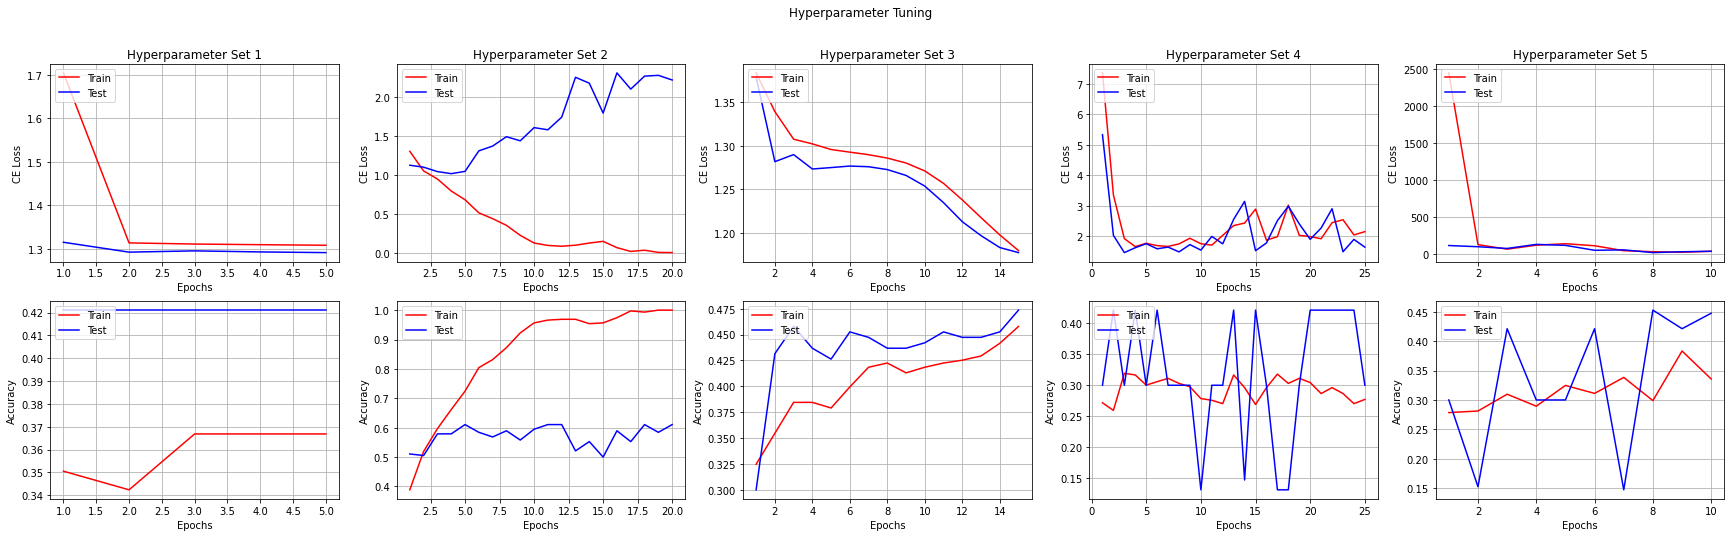

In [37]:
# TODO: visualize the training history including accuracy curves and loss curves
# Collect all variables
n_epochs = [n_epochs1, n_epochs2, n_epochs3, n_epochs4, n_epochs5]
train_loss_hist = [train_loss_hist1, train_loss_hist2, train_loss_hist3, train_loss_hist4, train_loss_hist5]
test_loss_hist = [test_loss_hist1, test_loss_hist2, test_loss_hist3, test_loss_hist4, test_loss_hist5]
train_acc_hist = [train_acc_hist1, train_acc_hist2, train_acc_hist3, train_acc_hist4, train_acc_hist5]
test_acc_hist = [test_acc_hist1, test_acc_hist2, test_acc_hist3, test_acc_hist4, test_acc_hist5]
# Set plot parameters
fig, axs = plt.subplots(2, 5, figsize=(30, 8)) # Create side-by-side subplots
fig.suptitle('Hyperparameter Tuning') # Common plot title
# Plot loss curves
for i in range(len(n_epochs)):
    axs[0,i].plot(np.linspace(1, n_epochs[i], n_epochs[i]), train_loss_hist[i], label='Train', color='red') # Plot train loss
    axs[0,i].plot(np.linspace(1, n_epochs[i], n_epochs[i]), test_loss_hist[i], label='Test', color ='blue') # Plot test loss
    axs[0,i].title.set_text('Hyperparameter Set '+str(i+1))
    axs[0,i].legend(loc='upper left') # Show legend
    axs[0,i].set_xlabel('Epochs') # Show label for X-axis
    axs[0,i].set_ylabel('CE Loss') # Show label for Y-axis
    axs[0,i].grid(True) # Show grid
# Plot accuracy curves
for i in range(len(n_epochs)):
    axs[1,i].plot(np.linspace(1, n_epochs[i], n_epochs[i]), train_acc_hist[i], label='Train', color='red') # Plot train accuracy
    axs[1,i].plot(np.linspace(1, n_epochs[i], n_epochs[i]), test_acc_hist[i], label='Test', color ='blue') # Plot test accuracy
    axs[1,i].legend(loc='upper left') # Show legend
    axs[1,i].set_xlabel('Epochs') # Show label for X-axis
    axs[1,i].set_ylabel('Accuracy') # Show label for Y-axis
    axs[1,i].grid(True) # Show grid

**Analysis of Hyperparameter Sets:**

- The first hypermeter set saturated the training really quickly (the `train_acc` evolved close to none over time). This may be due to the large `kernel_size`, which could not capture smaller features.

- It can be observed that hyperparameter set 2 performed the best in terms of training and testing accuracy metrics (`train_acc` ~ 1, `test_acc` ~ 0.6). However, this model seems to be overfitting to the training data since the `train_loss` ~ 0 is far greater than the `test_loss` ~ 2.2 (the loss curves also support this assertion). This may be due to prolonged training for `n_epochs` = 20.

- Hyperparameter set 3 accounted towards the most stable training (due to low learning rate). Although the loss/accuracy metrics are not the best among others, they might have improved if the training was allowed to continue for a few more epochs.

- Model trained using hyperparameter set 4 seems to be really confused on the test dataset (the `test_acc` kept fluctuating). This is evidently a result of high learning rate. However, the loss curve suggests that there was no significant overfitting. Thus, the instability may also be a result of the `Tanh` activation function.

- The final model trained using hyperparameter set 4 seems to be underfitting since the `train_loss` is significantly high (~36 on last epoch). This can be amounted to `hidden_layers` = 1, which is low.

**Effect of Hyperparameters:**

- **`dataset`:** That data is of utmost importance. The size, variability and balancing of data is key to training good models for the given application. In this case, the size of given data (`949`) was observed to be low for the application of multi-class classification. Additionally, the variability of data (`bicycle=95`, `car=247`, `motorcycle=280`, `truck=137`) was also not great, it had far more samples of cars and motorcycles as compared to trucks and least number of samples of bicycles. Finally, the data balancing during train-test split was also not ideal (due to randomization).
- **`kernel_size`:** Generally, odd-sized smaller kernels (3x3) are preferred for capturing enough features/details for classification. However, depending on the application (e.g. end-to-end regression), moderately large kernel sizes such as 5X5, 7x7, etc. may also be used.
- **`hidden_layers`:** The "deepness" of the neural network depends on the amount of data being used and the problem at hand. Shallow neural networks tend to overfit on large datasets, whereas deep neural networks may underfit on small datasets.
- **`learning_rate`:** Generally, `lr=0.001` works good for most applications. However, depending on the application, dataset, neural network architecture, and the choice of other hyperparameters, slightly increasing or reducing the learning rate may improve the convergence/performance.
- **`n_epoch`:** Training too long may overfit the model, while training to less may underfit it. Consequently, the number of epochs primarily depends on the amount of data, neural network architecture and learning rate.
- **`activation_fn`:** Generally, ReLU performs good in most cases for hidden layers (Sigmoid and Softmax can be used in output layers for binary and multi-class classification, respectively). Tanh and ELU are sometimes unstable, whereas variants of ReLU (e.g. Leaky ReLU, SiLU) are empirically shown to work at par with ReLU for certain applications.

## Task 5: Conclusion

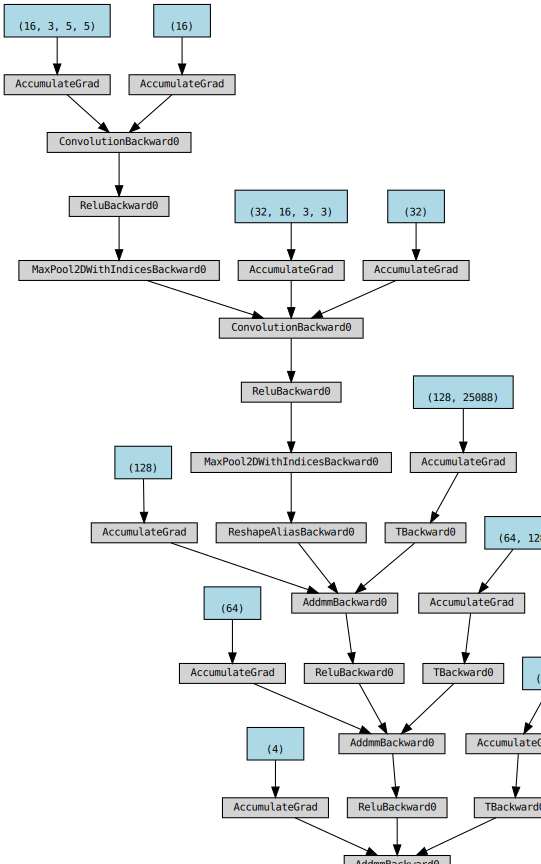

In [42]:
# TODO: visualize the optimal model
x = X_train_pytorch # PyTorch compatible input features
y = model(x) # Run predictions on inputs
make_dot(y, params=dict(list(model3.named_parameters()) + [('x', x)]), show_attrs=False, show_saved=False) # Generate visualization of PyTorch execution graphs and traces

**List hyperparameters and their values of your optimal model**

- kernel_size = 9
- hidden_layers = 4
- learning_rate = 0.0001
- n_epoch = 15
- activation_fn = SiLU

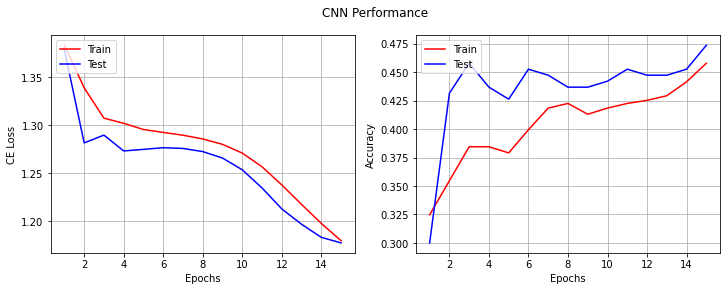

In [45]:
# TODO: visualize the training history including accuracy curves and loss curves of your optimal model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) # Create side-by-side subplots
fig.suptitle('CNN Performance') # Common plot title
# Plot loss curves
ax1.plot(np.linspace(1, n_epochs[2], n_epochs[2]), train_loss_hist[2], label='Train', color='red') # Plot train loss
ax1.plot(np.linspace(1, n_epochs[2], n_epochs[2]), test_loss_hist[2], label='Test', color ='blue') # Plot test loss
ax1.legend(loc='upper left') # Show legend
ax1.set_xlabel('Epochs') # Show label for X-axis
ax1.set_ylabel('CE Loss') # Show label for Y-axis
ax1.grid(True) # Show grid
# Plot accuracy curves
ax2.plot(np.linspace(1, n_epochs[2], n_epochs[2]), train_acc_hist[2], label='Train', color='red') # Plot train accuracy
ax2.plot(np.linspace(1, n_epochs[2], n_epochs[2]), test_acc_hist[2], label='Test', color ='blue') # Plot test accuracy
ax2.legend(loc='upper left') # Show legend
ax2.set_xlabel('Epochs') # Show label for X-axis
ax2.set_ylabel('Accuracy') # Show label for Y-axis
ax2.grid(True) # Show grid

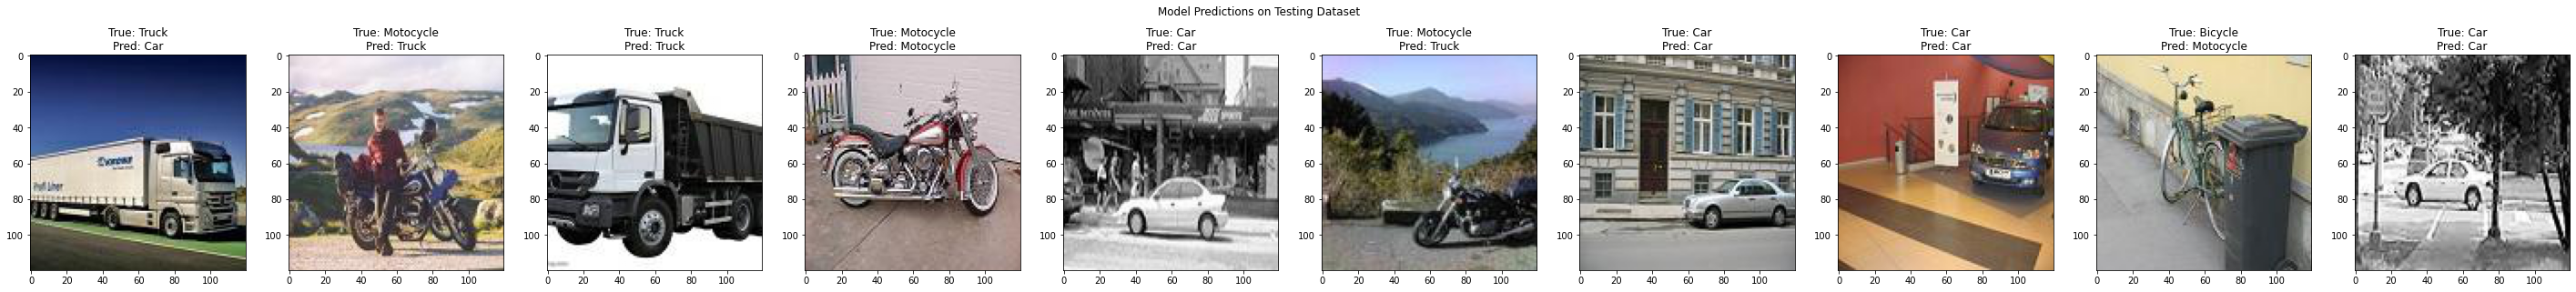

In [46]:
# TODO: visualize some examples with predicted labels
rnd_idx = np.random.randint(low=0, high=len(X_test_pytorch)-1, size=10, dtype=int) # Random sampling indices
X_samples = X_test_pytorch[rnd_idx] # Perform random sampling on testing dataset (features)
y_samples = y_test_pytorch[rnd_idx] # Perform random sampling on testing dataset (labels)
# Plot
figure, axes = plt.subplots(1, len(y_samples), figsize = (5*len(y_samples), 5)) # Set figure size based on number of samples
for i in range(len(y_samples)): # Loop through all the samples
    image = torchvision.utils.make_grid(X_test_pytorch[i].resize_(X_test_pytorch[i].shape[1], X_test_pytorch[i].shape[2], X_test_pytorch[i].shape[0])) # Get the image from tensor
    axes[i].imshow(image) # Show (plot) the image
    model3.eval() # Set model in evaluation mode
    y_pred = model3(X_test_pytorch) # Get model prediction (logits)
    y_pred = torch.argmax(y_pred, 1) # Get crisp classification
    axes[i].set_title("True: {}\nPred: {}".format(switch_int(y_test_pytorch[i].item()), switch_int(y_pred[i].item()))) # Set axis title [Format: True: <true_label> \nPred: <pred_label>)]
figure.suptitle("Model Predictions on Testing Dataset") # Set figure title
plt.show() # Show the figure